In [6]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.0f}'.format)

## Cargando el dataset

In [7]:
df = pd.read_csv("data/all-states-history.csv")
print(f"El DataFrame esta compuesto por {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame esta compuesto por 20780 filas y 41 columnas.


## Inspeccionando el dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

In [6]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930,9422,20780,7593,12382,12382,17339,20780,3789,11636,...,20614,20780,4789,3421,2200,999,9197,20780,14516,20780
mean,3682,3770,25,417,9263,9263,1191,37,1934,360,...,2186936,17508,163403,308920,165432,168188,965011,2740,2304555,12961
std,6281,4158,60,538,12621,12621,2060,208,1953,595,...,4436508,33586,201698,423285,178182,143748,1415215,16219,4445365,37495
min,0,0,-201,0,1,1,0,-12257,6,0,...,0,-130545,0,1,1,3,0,-1043744,0,-1154583
25%,161,607,0,79,985,985,166,0,501,60,...,104050,1206,18965,20047,54913,37676,141470,0,132460,0
50%,1108,2410,6,216,4472,4472,531,0,1295,172,...,655267,6125,84652,123384,103968,144130,419372,0,731651,1896
75%,4388,5462,24,460,12248,12248,1279,36,2451,380,...,2264766,19086,230011,432727,183103,255251,1229298,2478,2496925,12441
max,54124,21177,2559,2594,82237,82237,22851,16373,9263,5225,...,49646014,473076,1054711,2664340,995580,580372,11248247,820817,49646014,2164543


## Verificar columnas con datos faltantes

In [7]:
df.isnull().sum()

date                                    0
state                                   0
death                                 850
deathConfirmed                      11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

In [32]:
df["date"] = pd.to_datetime(df["date"])

#Agrupando por fecha y sumando valores
df_time = df.groupby("date")[["positive", "death", "hospitalizedCurrently"]].sum()
df_time.head()

,positive,death,hospitalizedCurrently
date,,,
2020-01-13,0,0,0
2020-01-14,0,0,0
2020-01-15,0,0,0
2020-01-16,0,0,0
2020-01-17,0,0,0


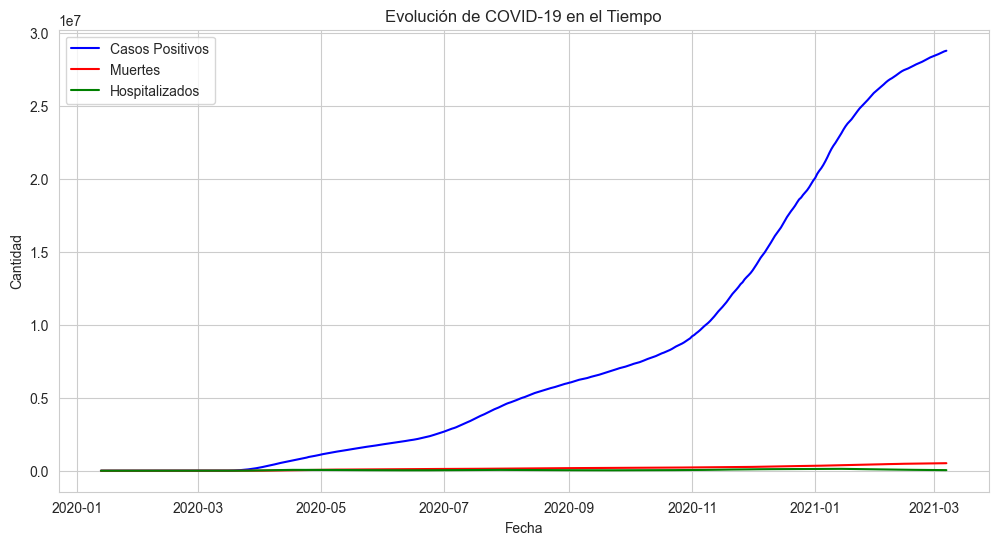

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time["positive"], label="Casos Positivos", color="blue")
plt.plot(df_time.index, df_time["death"], label="Muertes", color="red")
plt.plot(df_time.index, df_time["hospitalizedCurrently"], label="Hospitalizados", color="green")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Evolución de COVID-19 en el Tiempo")
plt.legend()
plt.show()


## Estados con más casos positivos

In [37]:
df_states = df.groupby("state")[["positive", "death", "hospitalizedCurrently"]].max()
df_states = df_states.sort_values(by="positive", ascending=False)
df_states.head(10)  # Muestra los 10 estados con más casos

,positive,death,hospitalizedCurrently
state,,,
CA,3501394,54124,22851
TX,2686818,44451,14218
FL,1909209,32266,9520
NY,1681169,39029,18825
IL,1198335,23014,6175
GA,1023487,17906,6108
OH,978471,17656,5296
PA,948643,24349,6346
NC,872176,11502,3990


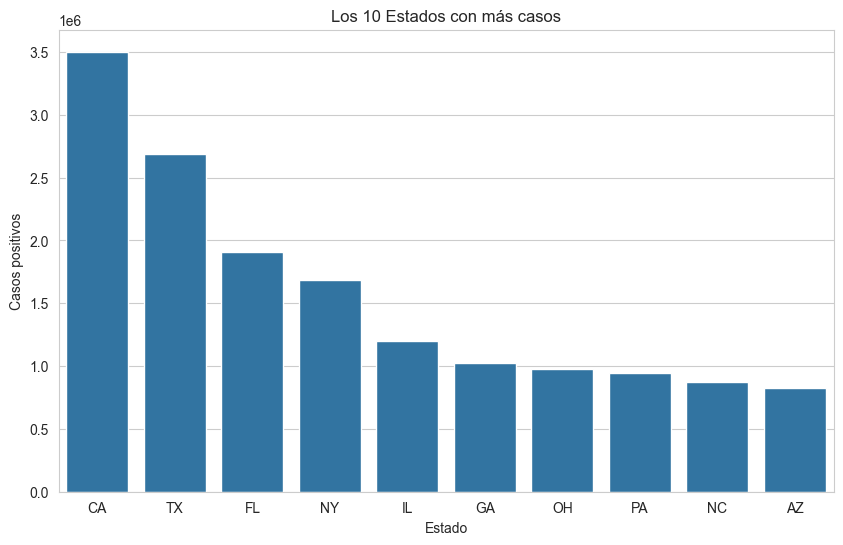

In [38]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=df_states.index[:10], y=df_states["positive"][:10])
plt.xlabel("Estado")
plt.ylabel("Casos positivos")
plt.title("Los 10 Estados con más casos")
plt.xticks(rotation=0)
plt.show()

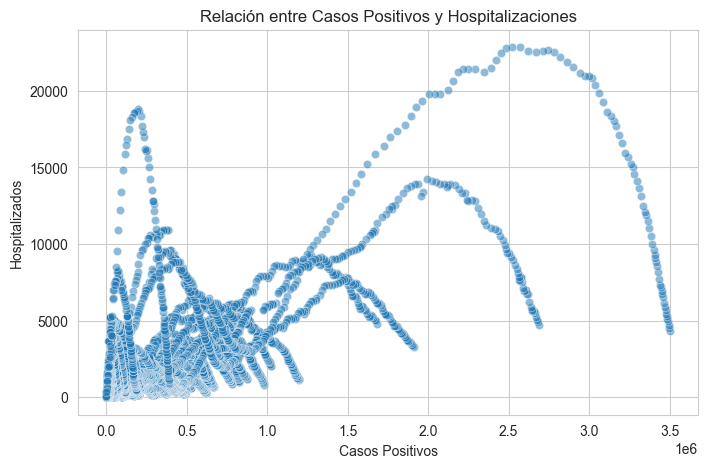

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["positive"], y=df["hospitalizedCurrently"], alpha=0.5)
plt.xlabel("Casos Positivos")
plt.ylabel("Hospitalizados")
plt.title("Relación entre Casos Positivos y Hospitalizaciones")
plt.show()

# Análisis de Pruebas
Vamos a comparar el número de pruebas con los casos detectados.

## Relación entre pruebas y casos positivos

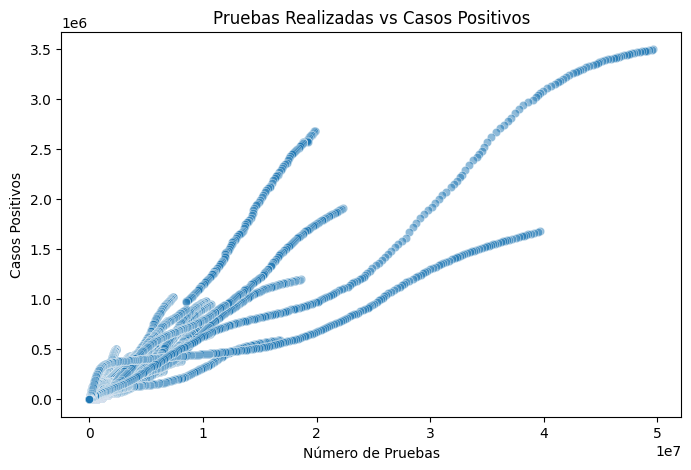

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["totalTestResults"], y=df["positive"], alpha=0.5)
plt.xlabel("Número de Pruebas")
plt.ylabel("Casos Positivos")
plt.title("Pruebas Realizadas vs Casos Positivos")
plt.show()

## Calcular porcentaje de positividad

In [41]:
df["positivity_rate"] = (df["positive"] / df["totalTestResults"]) * 100
df[["state", "date", "positivity_rate"]].sort_values(by="positivity_rate", ascending=False).head(10)


,state,date,positivity_rate
20762,WA,2020-01-26,inf
20768,WA,2020-01-23,inf
20734,WA,2020-02-03,inf
20460,GA,2020-03-06,inf
20359,GA,2020-03-08,inf
20410,GA,2020-03-07,inf
20497,GA,2020-03-05,inf
20528,GA,2020-03-04,inf
20770,WA,2020-01-22,inf
20633,WA,2020-02-23,inf
